# Netflix Data Analysis

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Load Data

In [2]:
# Load dataset
df = pd.read_csv("Netflix Dataset.csv")


#Display basic info

In [5]:
# Display basic info
print("📊 Dataset Information:")
print(df.info())



📊 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB
None


In [4]:
print("\n🔹 First 5 rows:")
print(df.head())


🔹 First 5 rows:
  Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

        Release_Date Rating   Duration  \
0    August 14, 2020  TV-MA  4 Seasons   
1  December 23, 2016  TV-MA     93 min   
2  December 20, 2018      R     78 min   
3  November 16, 2017  PG-13     80 min   
4    January 1, 2020  PG-13    123 min   

              

# 1. Data Cleaning


# Check missing values

In [6]:
# Check missing values
print("\n🔍 Missing Values:")
print(df.isnull().sum())



🔍 Missing Values:
Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64


# Drop duplicates if any

In [8]:
# Drop duplicates if any
df.drop_duplicates(inplace=True)


# Fill missing country, director, and cast values with 'Unknown'

In [10]:
# Fill missing country, director, and cast values with 'Unknown'
df['Country'].fillna('Unknown', inplace=True)
df['Director'].fillna('Unknown', inplace=True)
df['Cast'].fillna('Unknown', inplace=True)

/tmp/ipython-input-2543171071.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Country'].fillna('Unknown', inplace=True)
/tmp/ipython-input-2543171071.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

# Convert 'Release_Date' to datetime

In [13]:
# Convert 'Release_Date' to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Extract year from Release_Date

In [16]:
# Extract year from Release_Date
df['year_added'] = df['Release_Date'].dt.year

# 2. Movies vs TV Shows Over Years


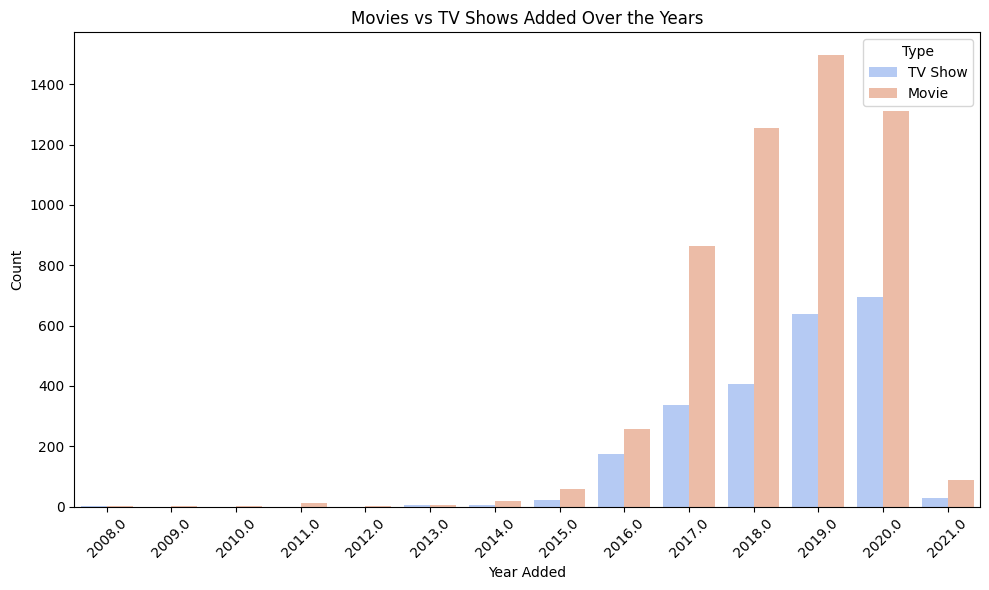

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='year_added', hue='Category', palette='coolwarm')
plt.title("Movies vs TV Shows Added Over the Years")
plt.xlabel("Year Added")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.tight_layout()
plt.show()

# 3. Top 10 Genres (Based on 'listed_in')


In [20]:
# Split genres and count
genres = df['Type'].dropna().str.split(', ')
genres = genres.explode()
top_genres = genres.value_counts().head(10)

/tmp/ipython-input-3892629202.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


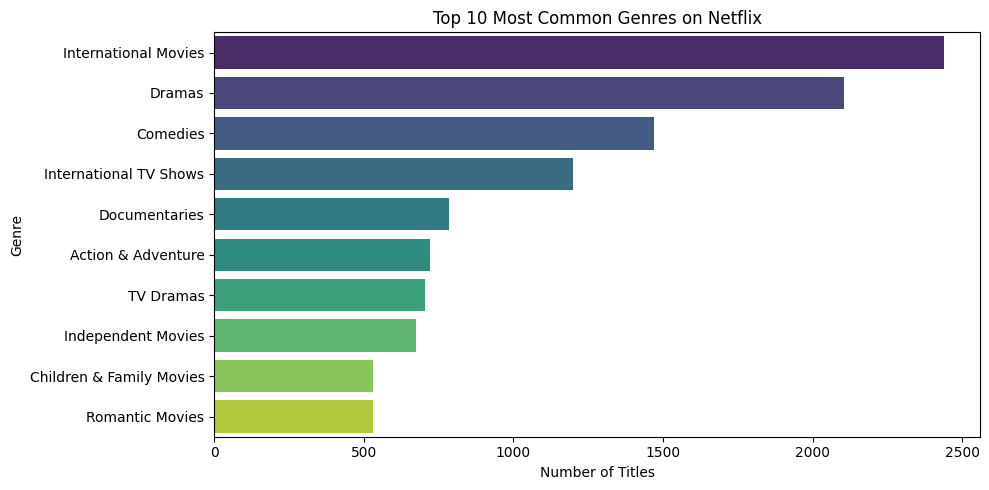

In [21]:
plt.figure(figsize=(10,5))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title("Top 10 Most Common Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


# 4. Country-wise Contribution


/tmp/ipython-input-912061707.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette='magma')


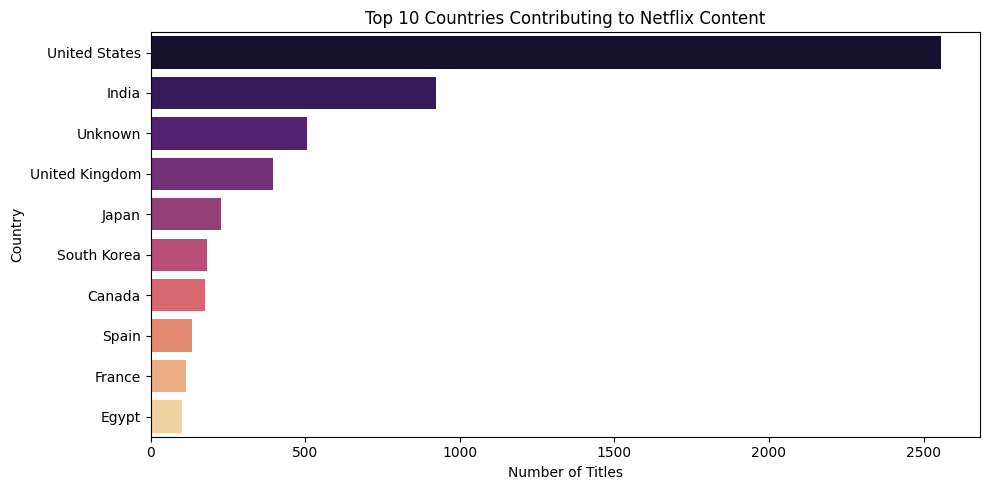

In [25]:
country_counts = df['Country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='magma')
plt.title("Top 10 Countries Contributing to Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.tight_layout()
plt.show()



# 5. Extra: Correlation Between Rating and Type (if available)


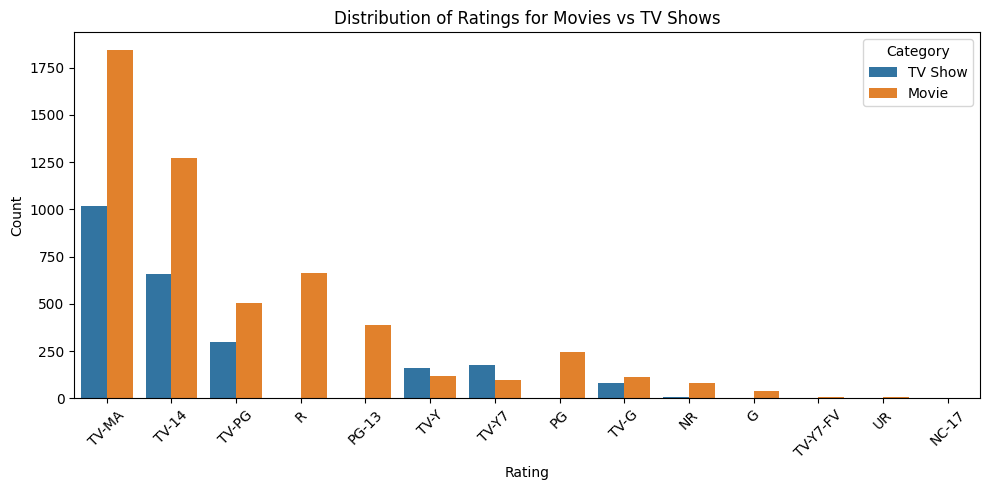

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Rating', hue='Category', order=df['Rating'].value_counts().index)
plt.title("Distribution of Ratings for Movies vs TV Shows")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. Insights Summary


In [29]:
print("\n📈 Key Insights:")
print(f"Total Movies: {len(df[df['Category']=='Movie'])}")
print(f"Total TV Shows: {len(df[df['Category']=='TV Show'])}")
print("\nTop Genres:\n", top_genres)
print("\nTop Contributing Countries:\n", country_counts)


📈 Key Insights:
Total Movies: 5377
Total TV Shows: 2410

Top Genres:
 Type
International Movies        2437
Dramas                      2106
Comedies                    1471
International TV Shows      1199
Documentaries                786
Action & Adventure           721
TV Dramas                    704
Independent Movies           673
Children & Family Movies     532
Romantic Movies              531
Name: count, dtype: int64

Top Contributing Countries:
 Country
United States     2555
India              923
Unknown            507
United Kingdom     397
Japan              226
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Name: count, dtype: int64


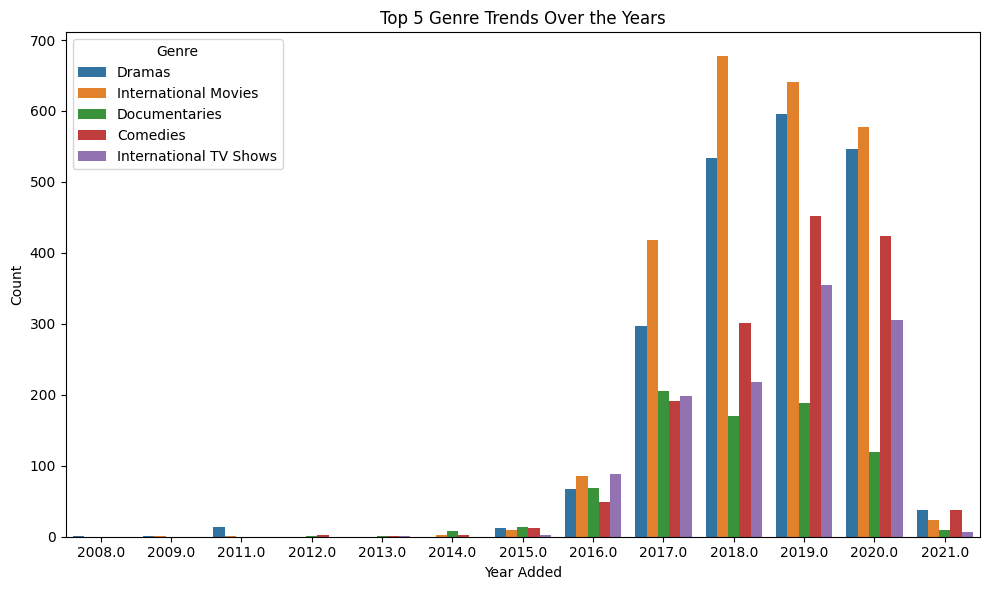

In [31]:
df_genre_year = df.dropna(subset=['year_added', 'Type'])
df_genre_year = df_genre_year.assign(genre=df_genre_year['Type'].str.split(', '))
df_genre_year = df_genre_year.explode('genre')
top5 = df_genre_year['genre'].value_counts().head(5).index
df_top5 = df_genre_year[df_genre_year['genre'].isin(top5)]
plt.figure(figsize=(10,6))
sns.countplot(data=df_top5, x='year_added', hue='genre')
plt.title("Top 5 Genre Trends Over the Years")
plt.xlabel("Year Added")
plt.ylabel("Count")
plt.legend(title='Genre')
plt.tight_layout()
plt.show()